In [1]:
%pip -q install docling quackling llama-index llama-index-llms-openllm pydantic-yaml
%pip -q install semantic-router semantic-chunkers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
types-requests 2.32.0.20240907 requires urllib3>=2, but you have urllib3 1.26.20 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deepsearch-toolkit 1.0.0 requires urllib3<2.0.0,>=1.26.8, but you have urllib3 2.2.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docling.document_converter import DocumentConverter
from docling.datamodel.base_models import PipelineOptions
from llama_index.llms.openllm import OpenLLM
from semantic_router.encoders.fastembed import FastEmbedEncoder
from semantic_chunkers import StatisticalChunker

import logging
import os
from dotenv import load_dotenv
from __future__ import annotations
from typing import Annotated, List
from pydantic import BaseModel, Field
from pydantic_core import from_json
from pydantic import ValidationError
from pydantic_yaml import to_yaml_str

_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)
load_dotenv()

/home/noelo/.pyenv/versions/3.10.14/envs/instvenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [3]:
source = "/home/noelo/dev/instruct-injest/data/CELEX_32021R1173_EN_TXT.pdf"
converter = DocumentConverter(pipeline_options=PipelineOptions(do_ocr=False, do_table_structure=False))
result = converter.convert_single(source)
_log.info(len(result.pages))
raw_text = result.output.export_to_markdown()

Fetching 7 files: 100%|██████████| 7/7 [00:00<00:00, 44552.55it/s]
INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Processing document CELEX_32021R1173_EN_TXT.pdf
INFO:docling.document_converter:Finished converting page batch time=5.070
INFO:docling.document_converter:Finished converting page batch time=4.476
INFO:docling.document_converter:Finished converting page batch time=4.454
INFO:docling.document_converter:Finished converting page batch time=4.265
INFO:docling.document_converter:Finished converting page batch time=4.221
INFO:docling.document_converter:Finished converting page batch time=4.237
INFO:docling.document_converter:Finished converting page batch time=4.232
INFO:docling.document_converter:Finished converting page batch time=4.089
INFO:docling.document_converter:Finished converting page batch time=3.675
INFO:docling.document_converter:Finished converting page batch time=4.289
INFO:docling.document_converter:Finished conve

This area needs work. It's not clear from the docs if the context passed to InstructLab can be a summerization of the actual text from the knowledge document.
Depending the answer the max_split_tokens value may need to change


In [ ]:
CONTEXT_MAX_SPLIT_TOKENS=500

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 40563.87it/s]
2024-09-19 09:34:31 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 500. Splitting to sentences before semantically merging.
  0%|          | 0/19 [00:00<?, ?it/s]

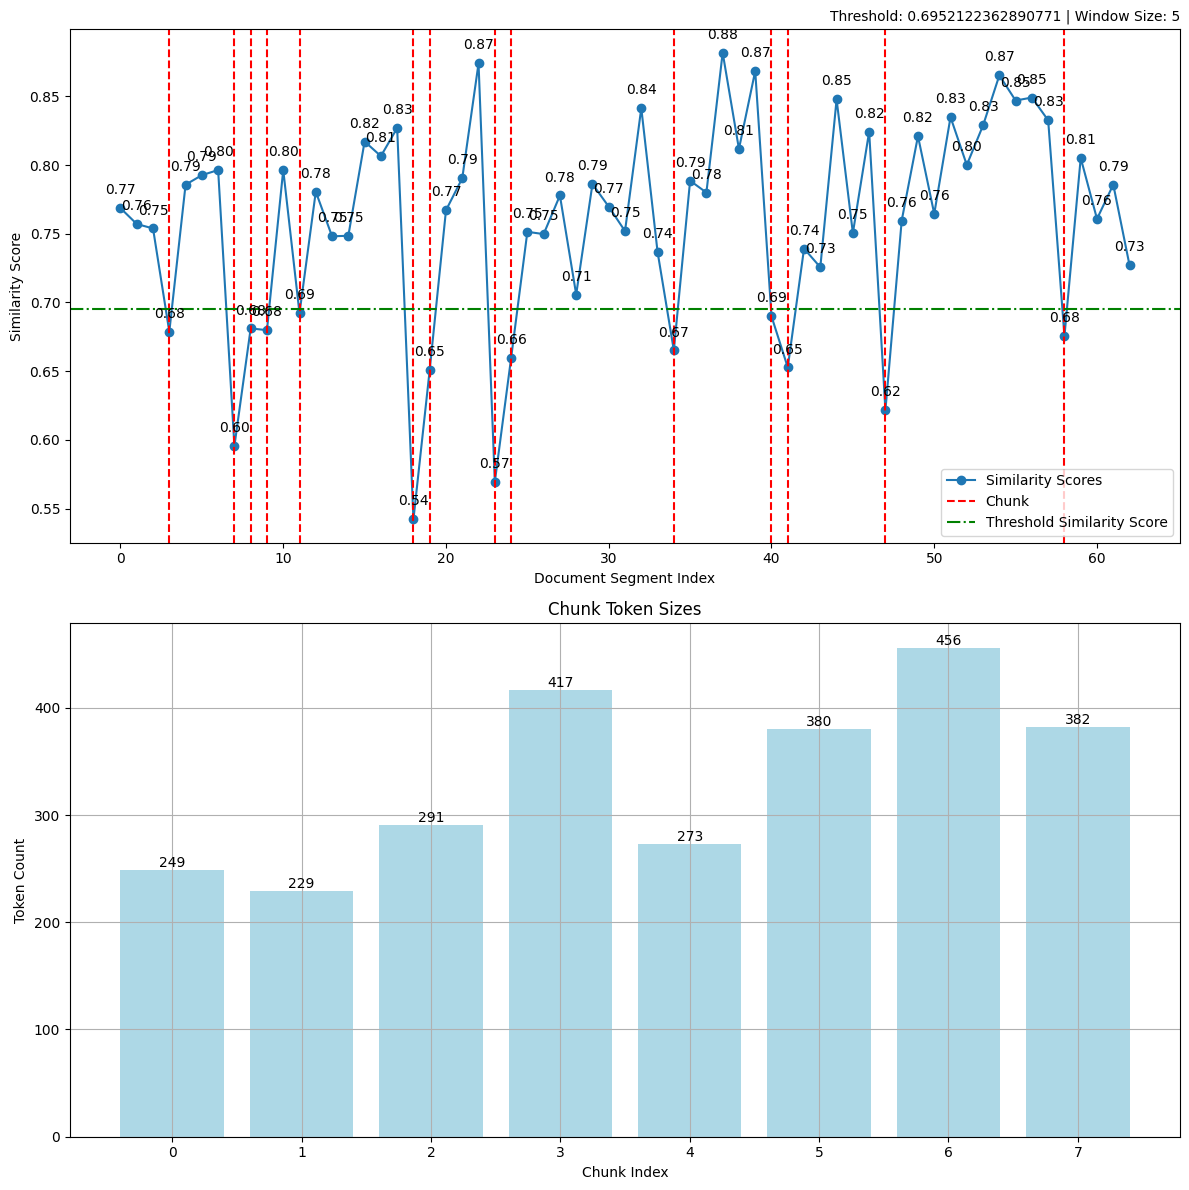

  5%|▌         | 1/19 [00:01<00:31,  1.75s/it]

Chunking Statistics:
  - Total Documents: 64
  - Total Chunks: 8
  - Chunks by Threshold: 6
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 229
  - Maximum Token Size of Chunk: 456
  - Similarity Chunk Ratio: 0.75


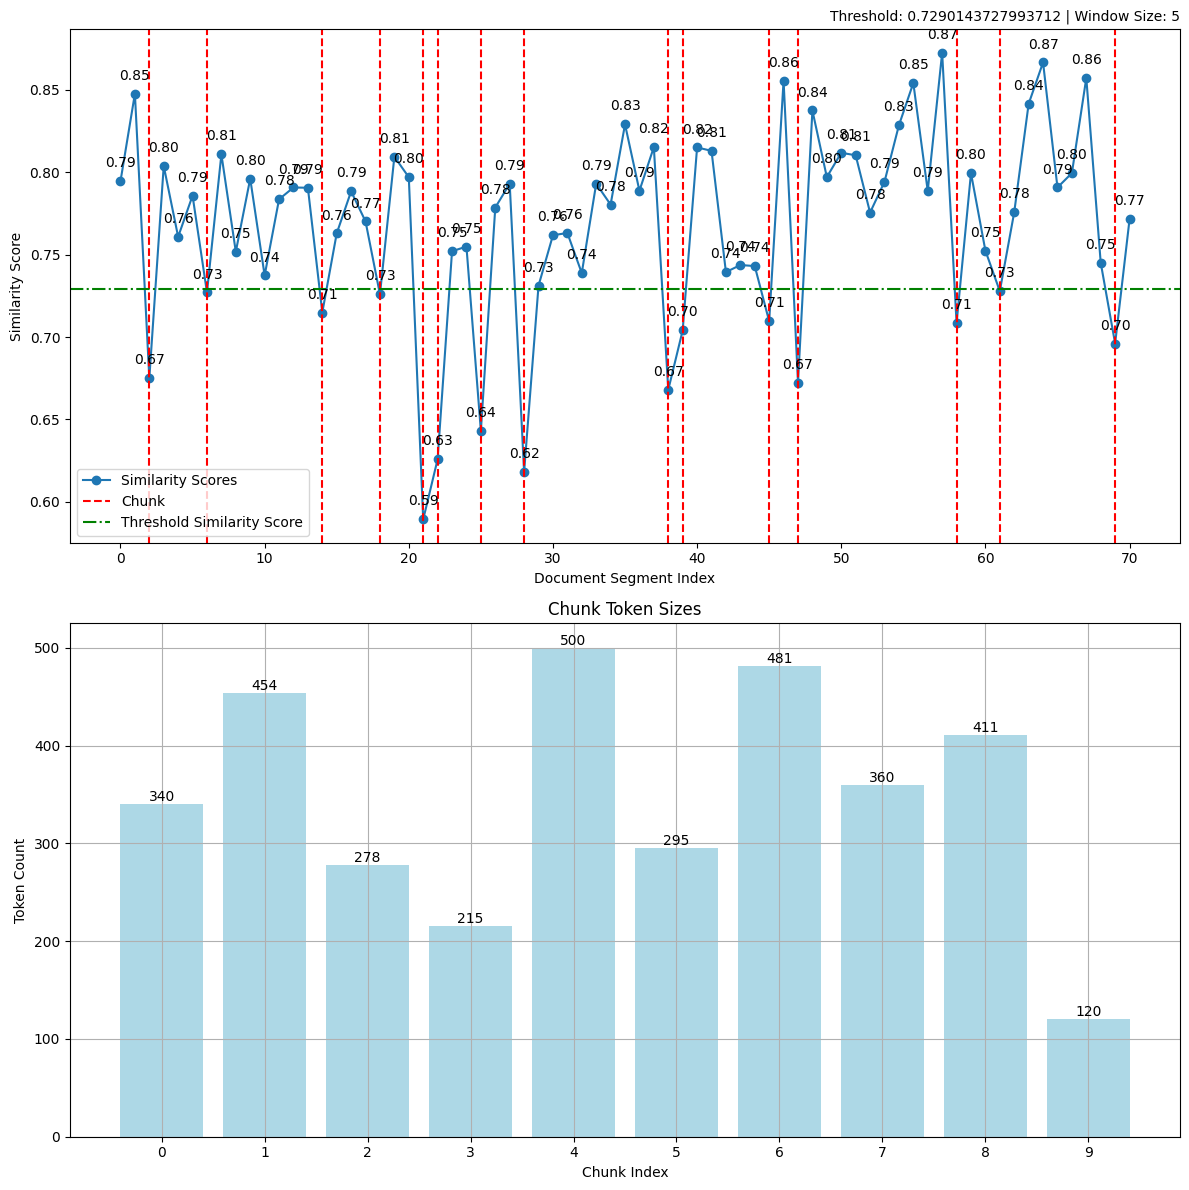

 11%|█         | 2/19 [00:03<00:27,  1.62s/it]

Chunking Statistics:
  - Total Documents: 72
  - Total Chunks: 10
  - Chunks by Threshold: 7
  - Chunks by Max Chunk Size: 2
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 120
  - Maximum Token Size of Chunk: 500
  - Similarity Chunk Ratio: 0.70


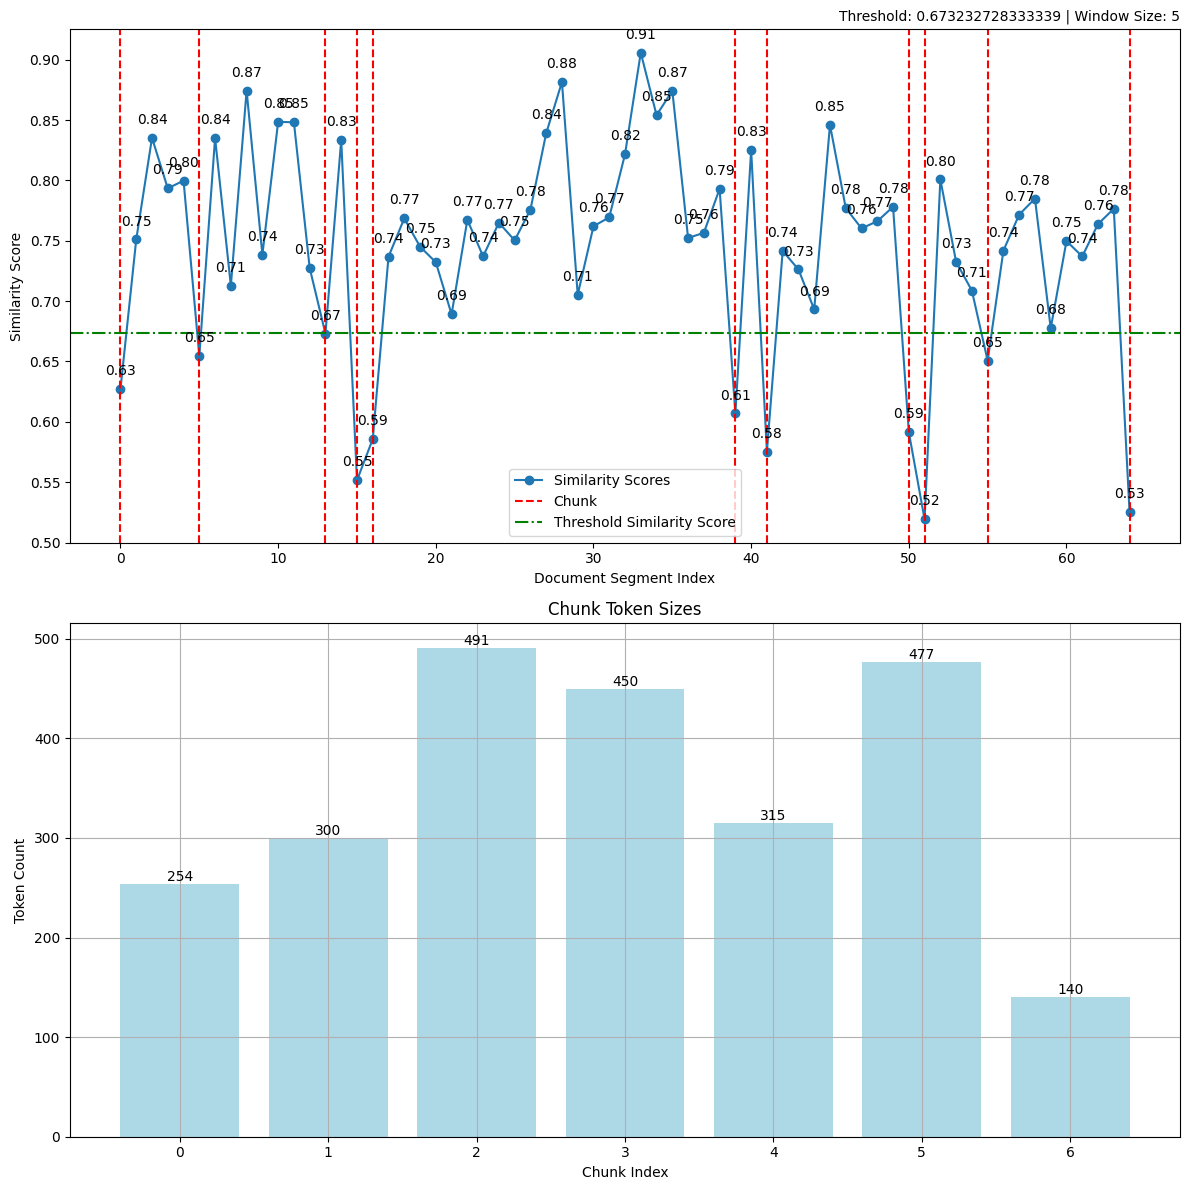

 16%|█▌        | 3/19 [00:04<00:24,  1.51s/it]

Chunking Statistics:
  - Total Documents: 66
  - Total Chunks: 7
  - Chunks by Threshold: 4
  - Chunks by Max Chunk Size: 2
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 140
  - Maximum Token Size of Chunk: 491
  - Similarity Chunk Ratio: 0.57


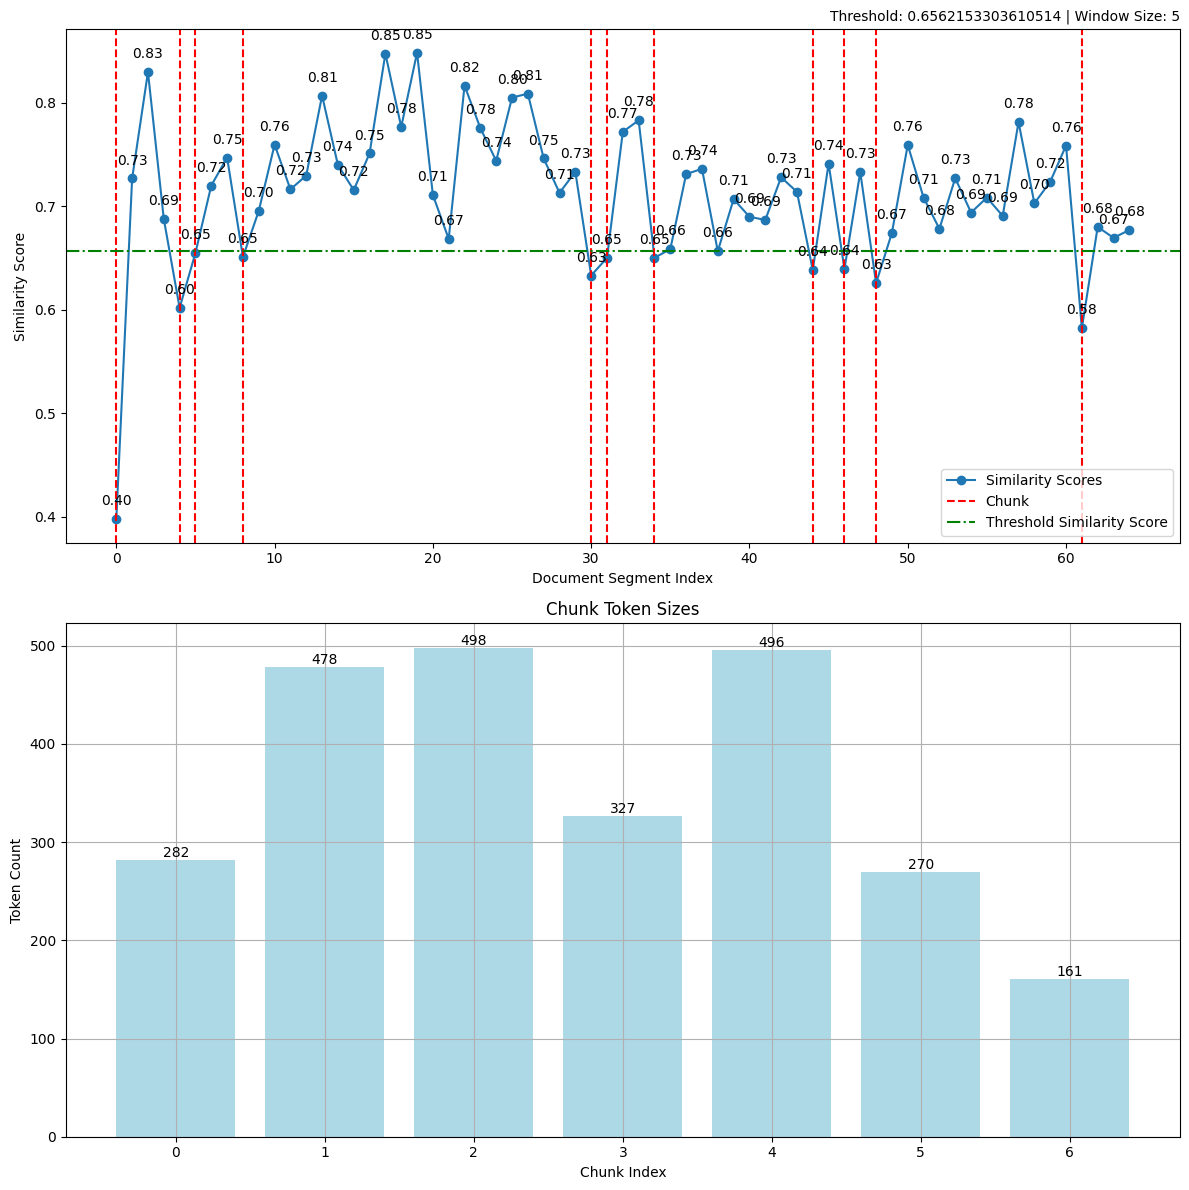

 21%|██        | 4/19 [00:06<00:24,  1.66s/it]

Chunking Statistics:
  - Total Documents: 66
  - Total Chunks: 7
  - Chunks by Threshold: 4
  - Chunks by Max Chunk Size: 2
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 161
  - Maximum Token Size of Chunk: 498
  - Similarity Chunk Ratio: 0.57


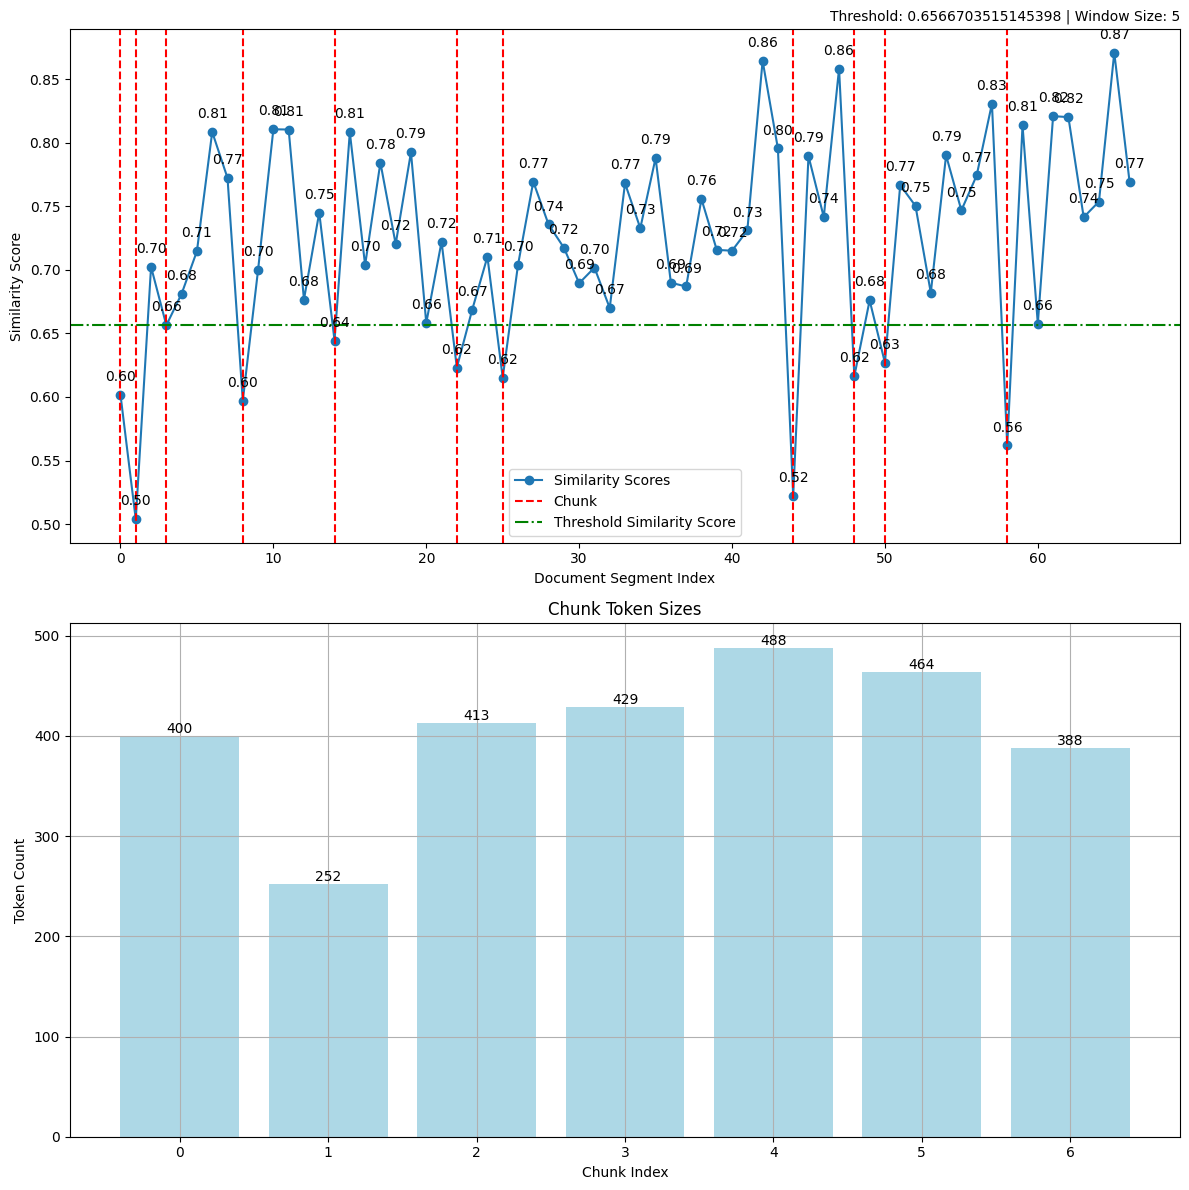

 26%|██▋       | 5/19 [00:08<00:23,  1.70s/it]

Chunking Statistics:
  - Total Documents: 68
  - Total Chunks: 7
  - Chunks by Threshold: 4
  - Chunks by Max Chunk Size: 2
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 252
  - Maximum Token Size of Chunk: 488
  - Similarity Chunk Ratio: 0.57


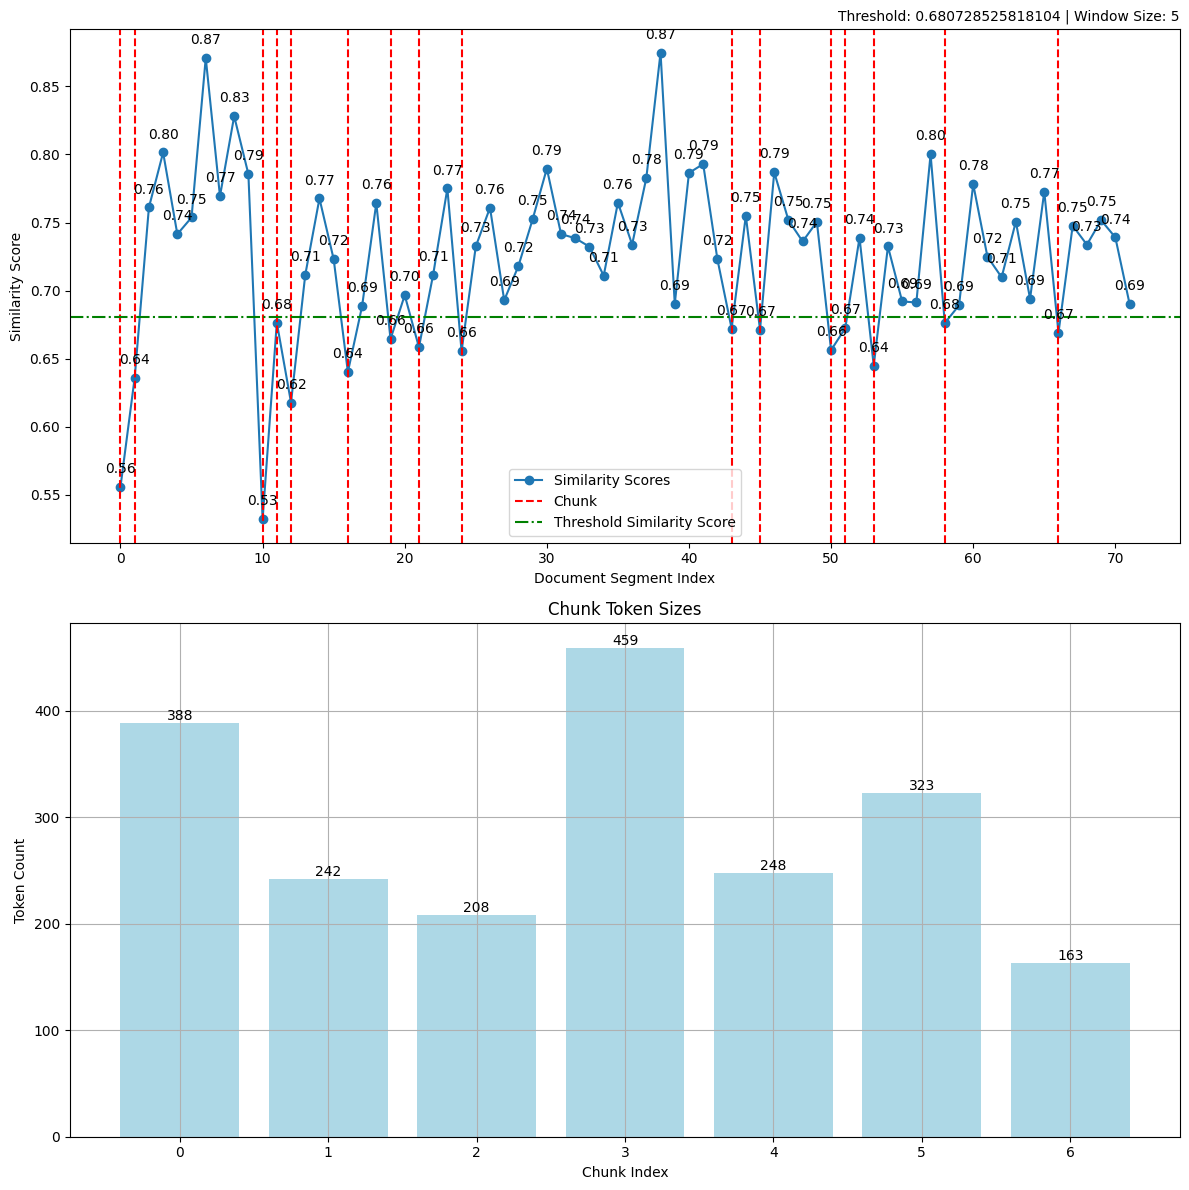

 32%|███▏      | 6/19 [00:10<00:22,  1.73s/it]

Chunking Statistics:
  - Total Documents: 73
  - Total Chunks: 7
  - Chunks by Threshold: 5
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 163
  - Maximum Token Size of Chunk: 459
  - Similarity Chunk Ratio: 0.71


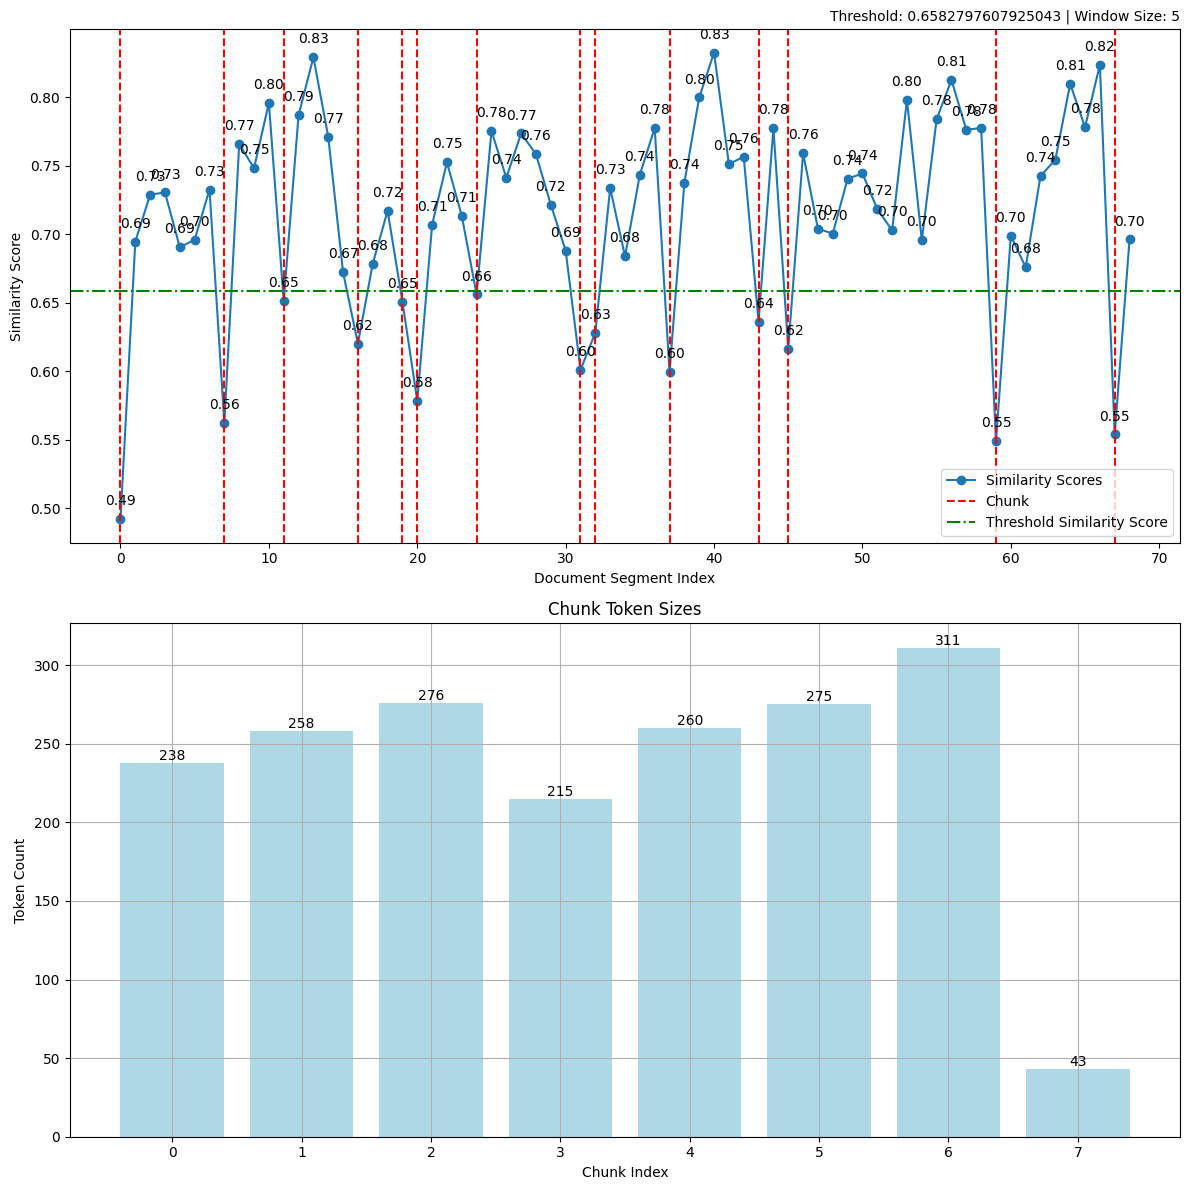

 37%|███▋      | 7/19 [00:11<00:19,  1.64s/it]

Chunking Statistics:
  - Total Documents: 70
  - Total Chunks: 8
  - Chunks by Threshold: 7
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 43
  - Maximum Token Size of Chunk: 311
  - Similarity Chunk Ratio: 0.88


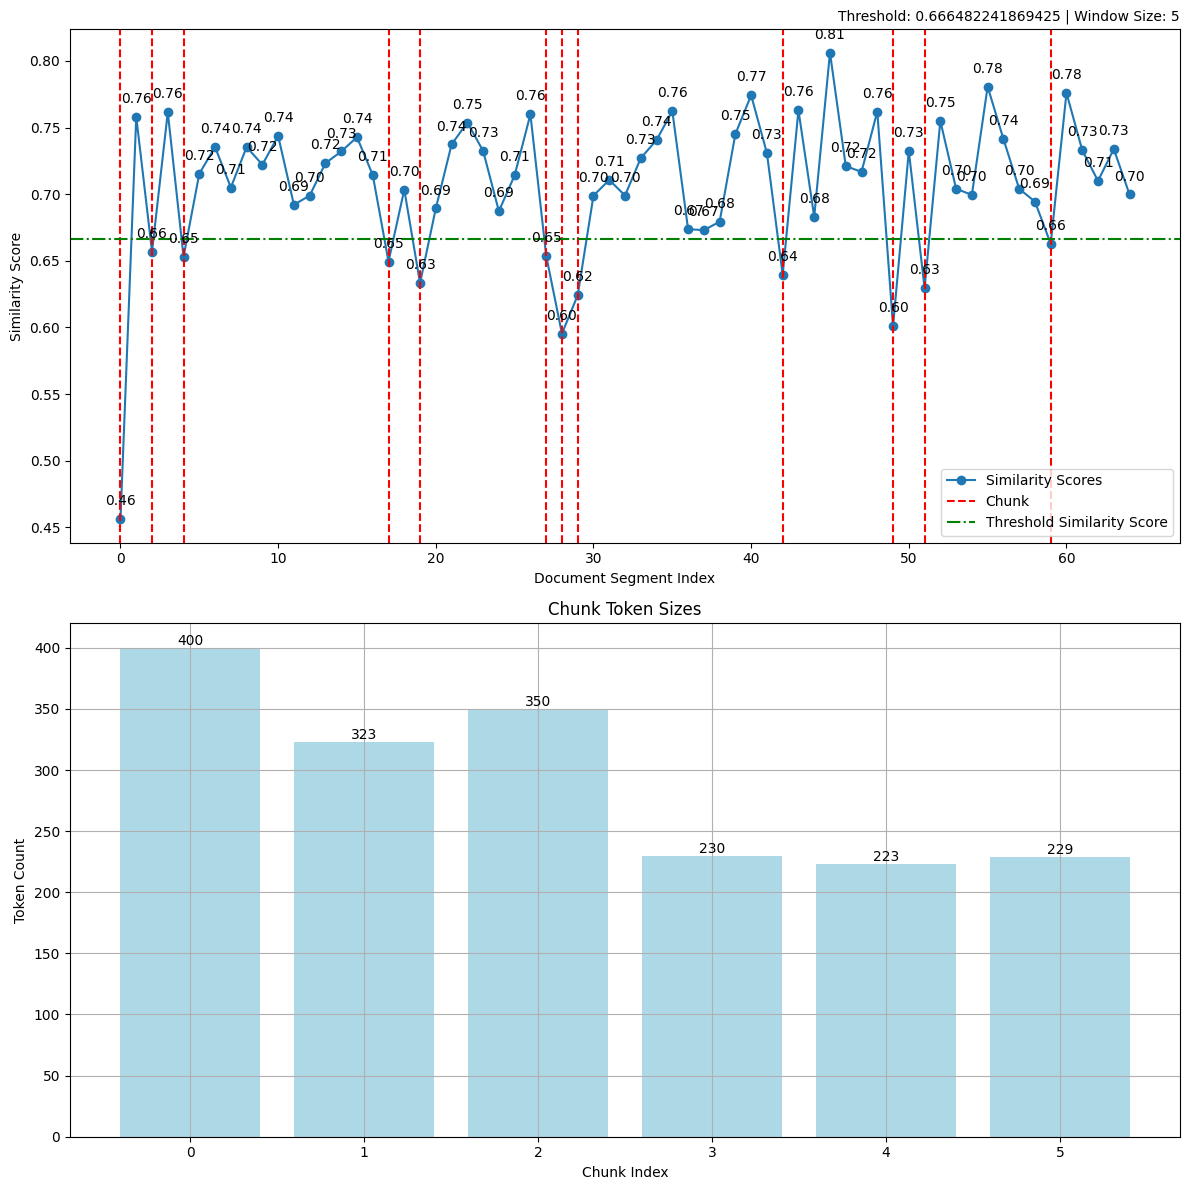

 42%|████▏     | 8/19 [00:12<00:16,  1.51s/it]

Chunking Statistics:
  - Total Documents: 66
  - Total Chunks: 6
  - Chunks by Threshold: 5
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 223
  - Maximum Token Size of Chunk: 400
  - Similarity Chunk Ratio: 0.83


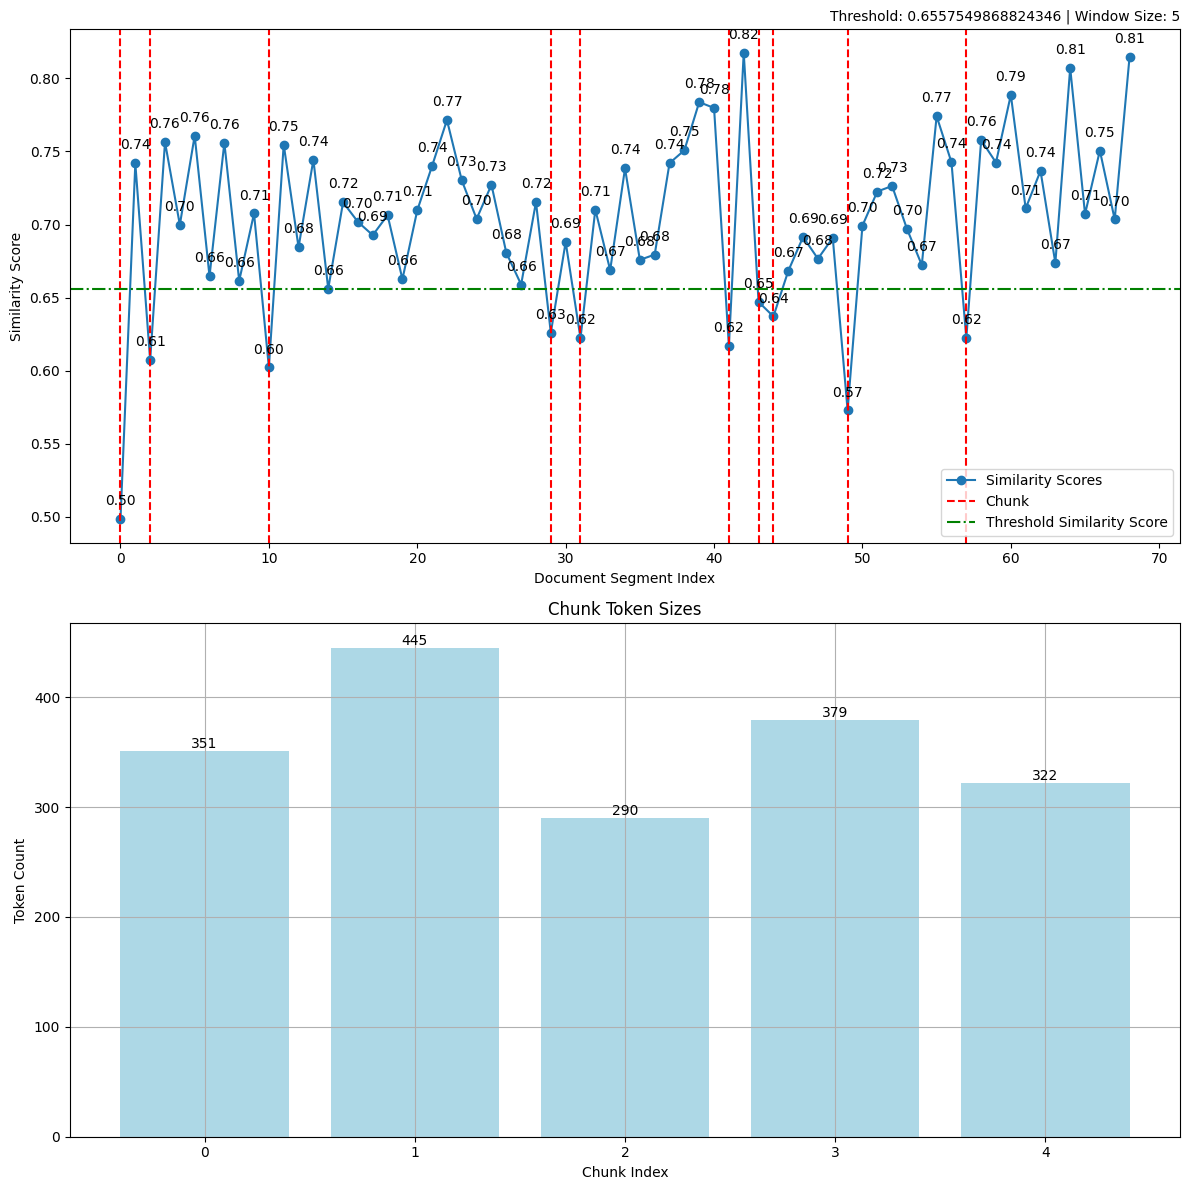

 47%|████▋     | 9/19 [00:14<00:15,  1.51s/it]

Chunking Statistics:
  - Total Documents: 70
  - Total Chunks: 5
  - Chunks by Threshold: 4
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 290
  - Maximum Token Size of Chunk: 445
  - Similarity Chunk Ratio: 0.80


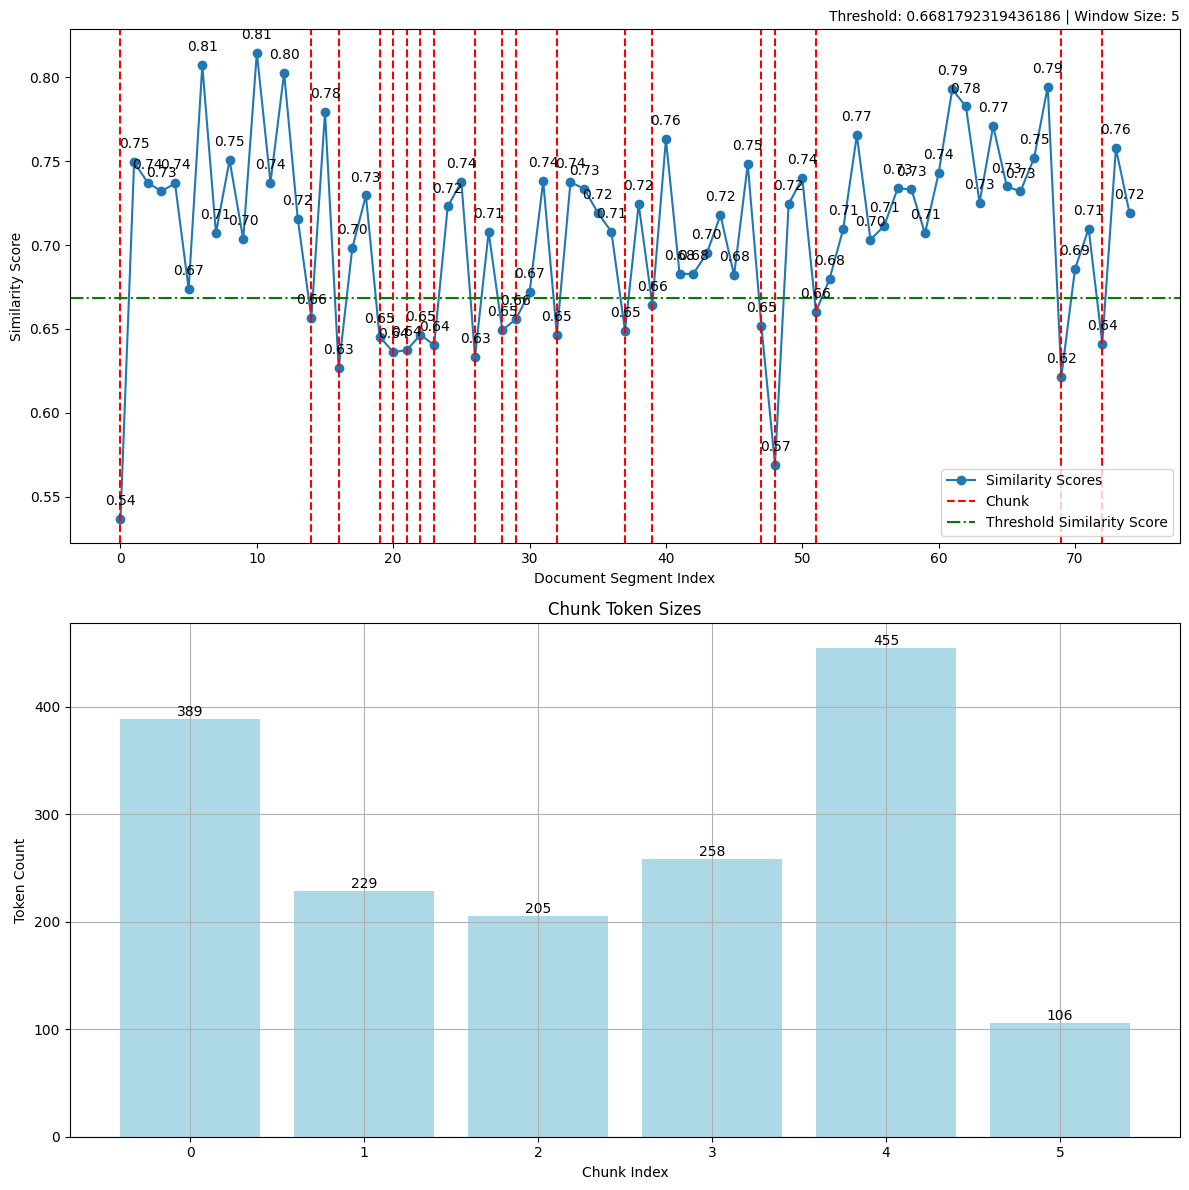

 53%|█████▎    | 10/19 [00:15<00:13,  1.47s/it]

Chunking Statistics:
  - Total Documents: 76
  - Total Chunks: 6
  - Chunks by Threshold: 5
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 106
  - Maximum Token Size of Chunk: 455
  - Similarity Chunk Ratio: 0.83


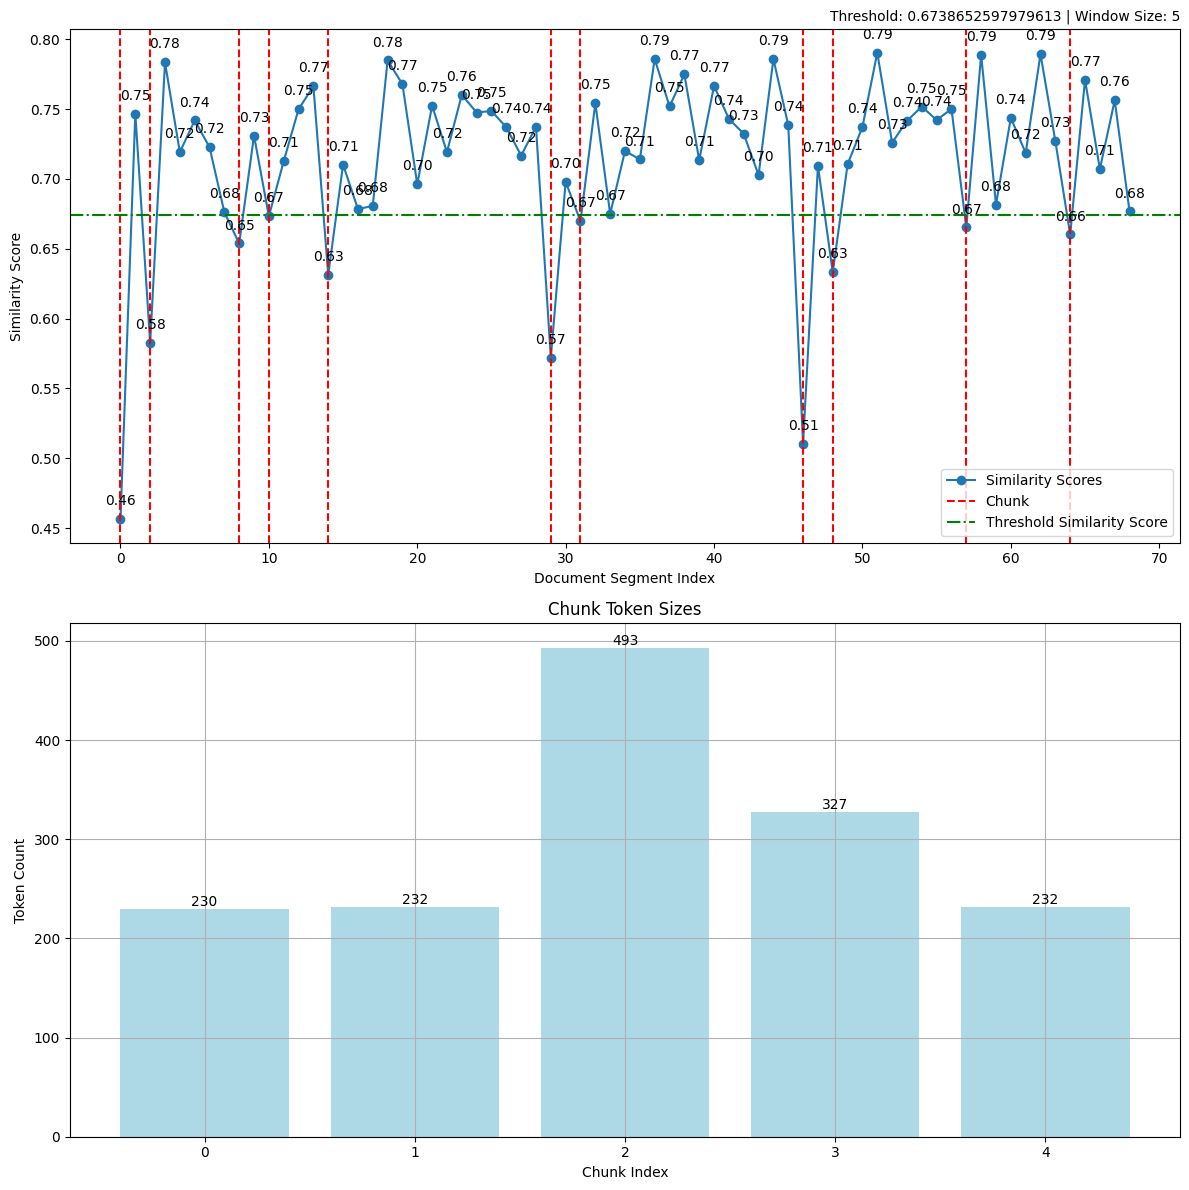

 58%|█████▊    | 11/19 [00:16<00:10,  1.35s/it]

Chunking Statistics:
  - Total Documents: 70
  - Total Chunks: 5
  - Chunks by Threshold: 3
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 230
  - Maximum Token Size of Chunk: 493
  - Similarity Chunk Ratio: 0.60


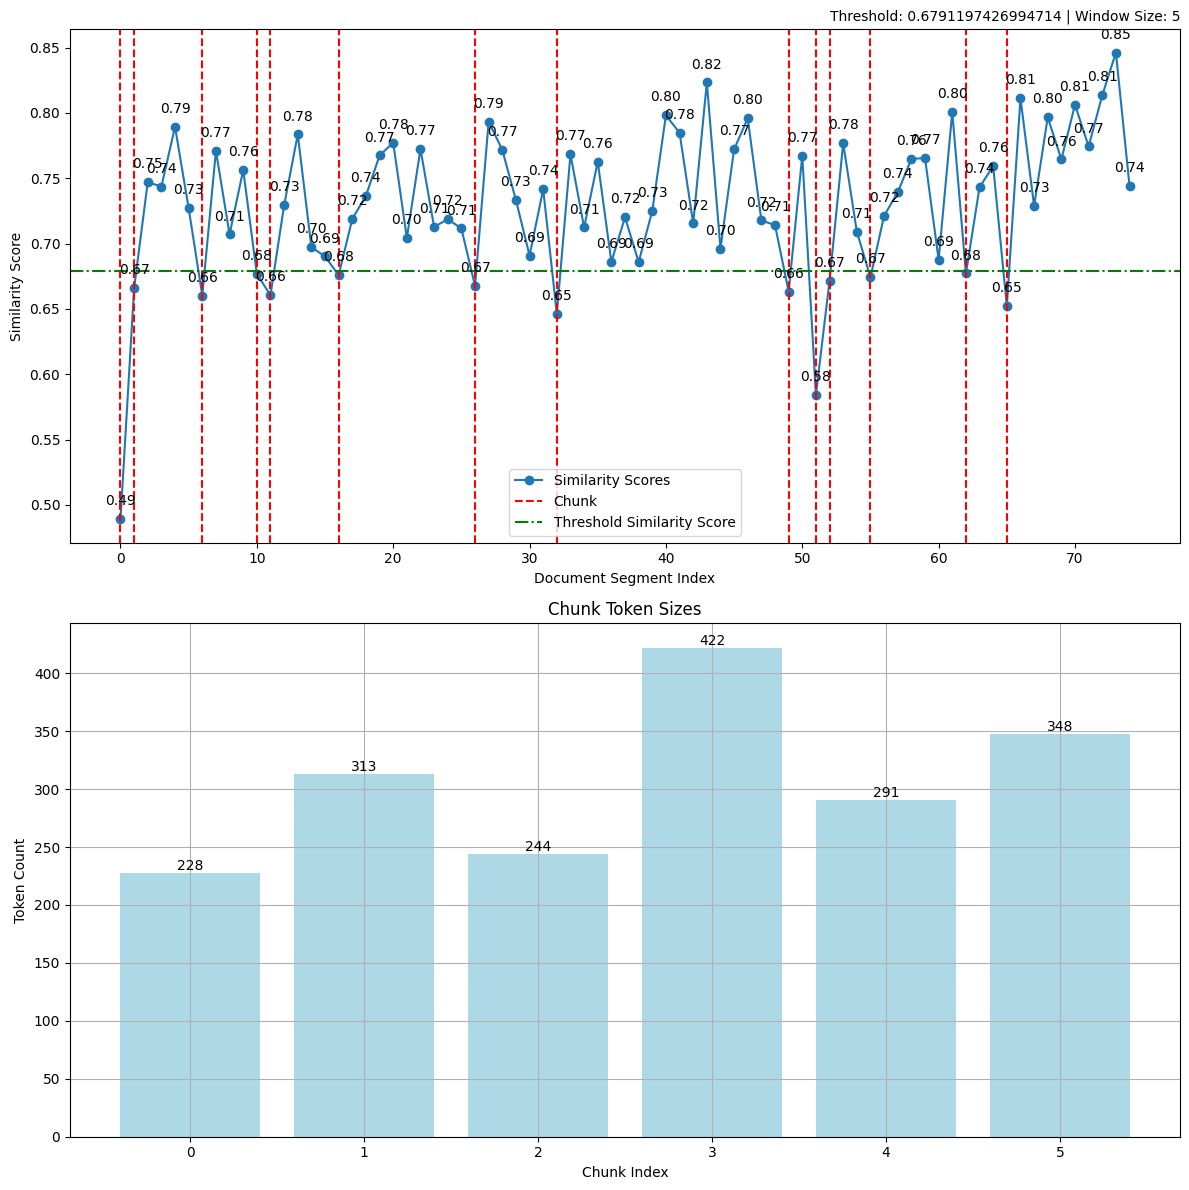

 63%|██████▎   | 12/19 [00:18<00:09,  1.42s/it]

Chunking Statistics:
  - Total Documents: 76
  - Total Chunks: 6
  - Chunks by Threshold: 5
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 228
  - Maximum Token Size of Chunk: 422
  - Similarity Chunk Ratio: 0.83


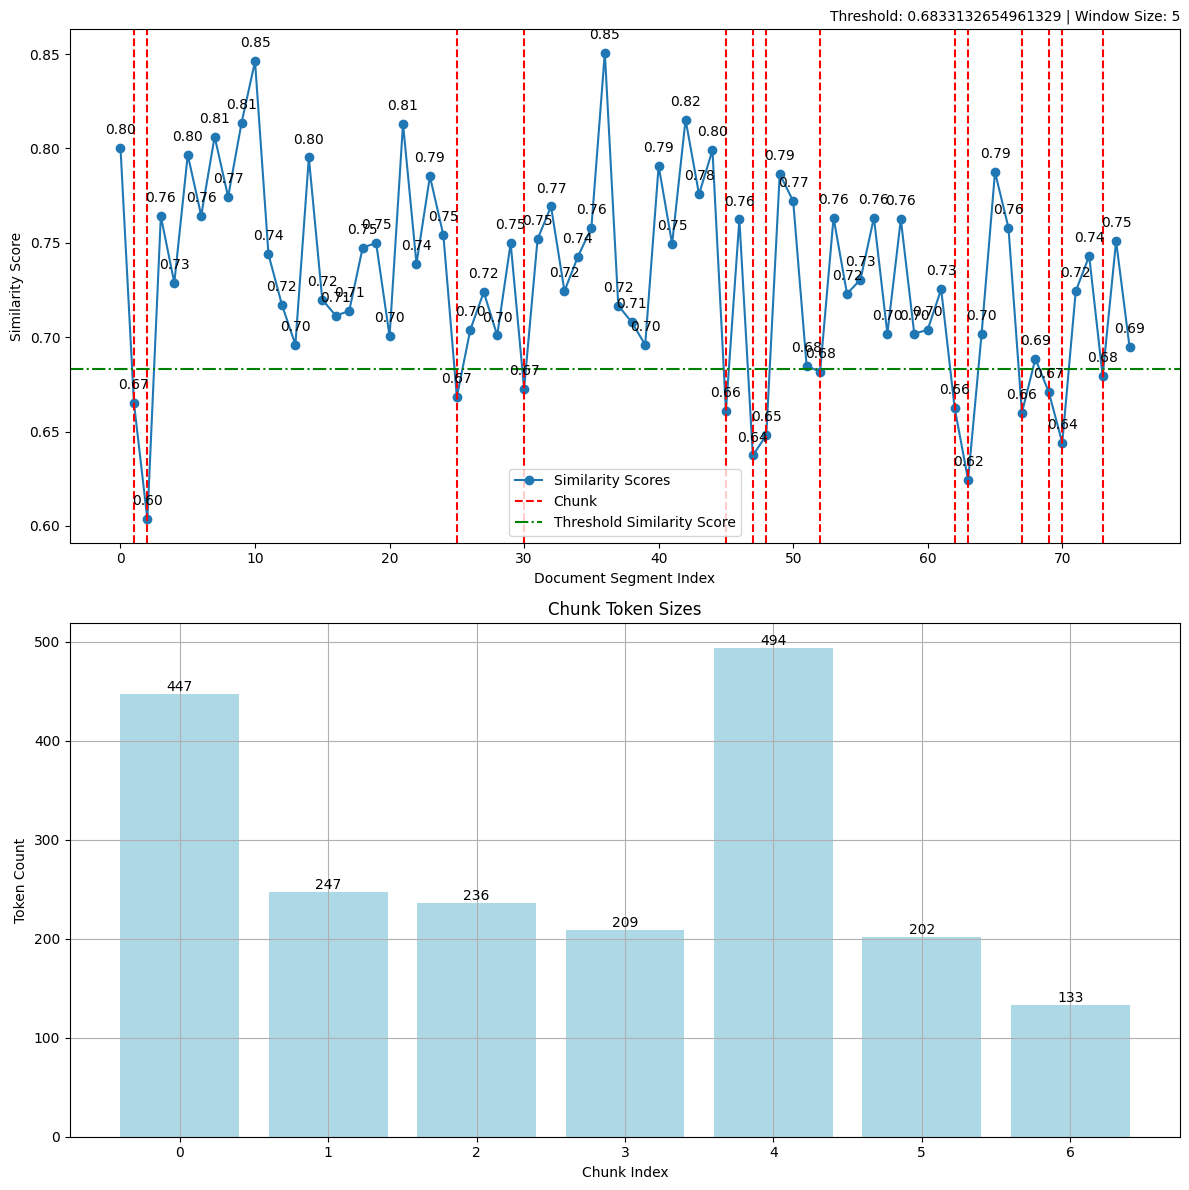

 68%|██████▊   | 13/19 [00:20<00:09,  1.60s/it]

Chunking Statistics:
  - Total Documents: 77
  - Total Chunks: 7
  - Chunks by Threshold: 5
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 133
  - Maximum Token Size of Chunk: 494
  - Similarity Chunk Ratio: 0.71


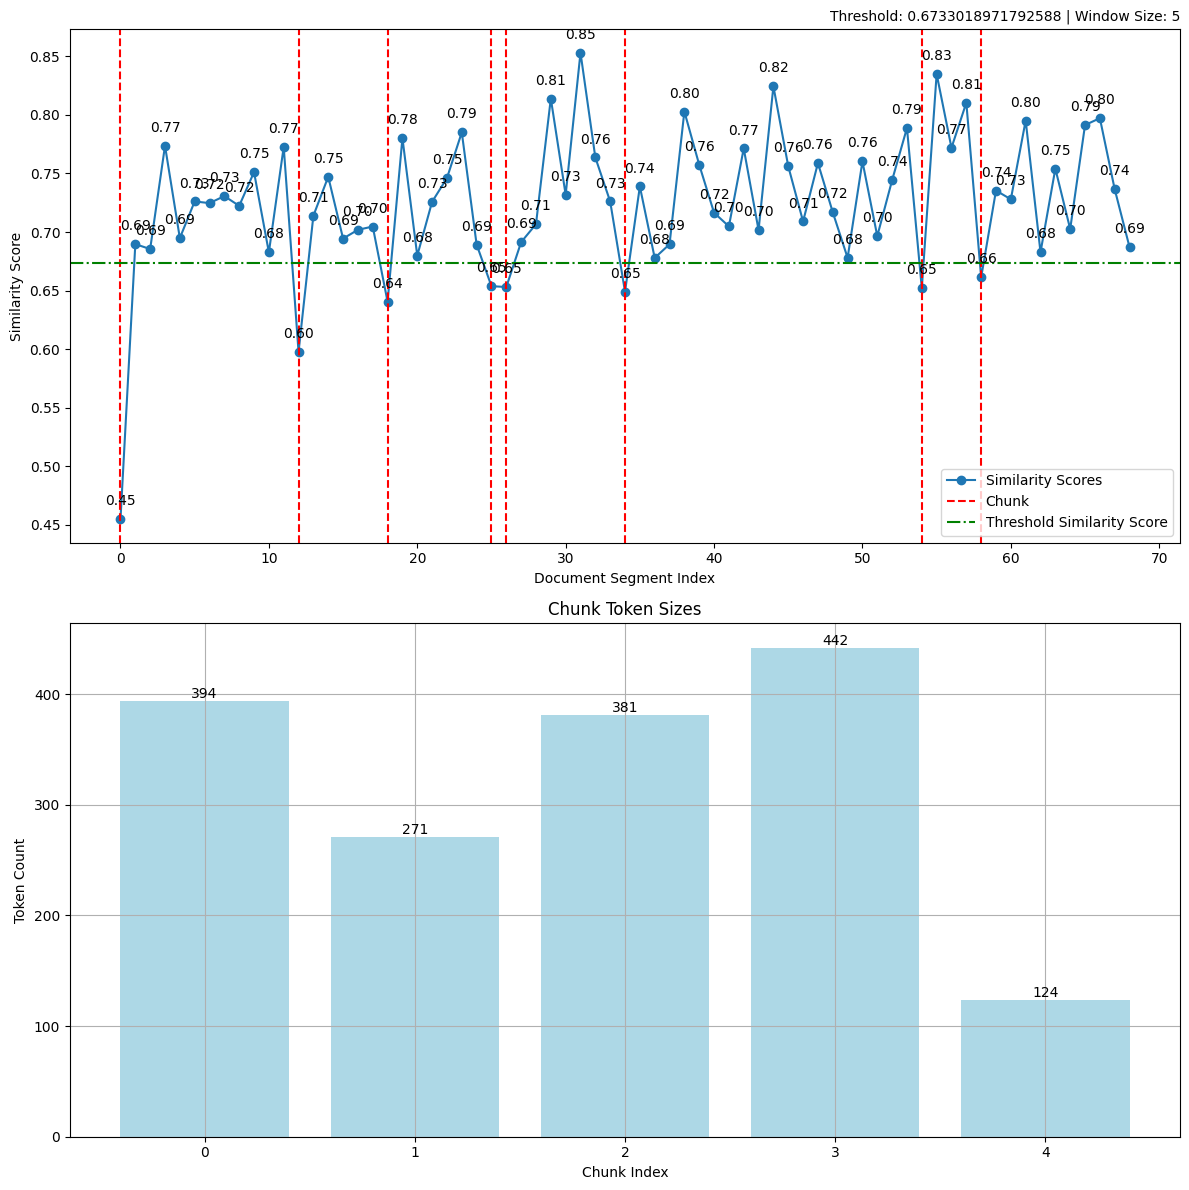

 74%|███████▎  | 14/19 [00:21<00:08,  1.61s/it]

Chunking Statistics:
  - Total Documents: 70
  - Total Chunks: 5
  - Chunks by Threshold: 3
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 124
  - Maximum Token Size of Chunk: 442
  - Similarity Chunk Ratio: 0.60


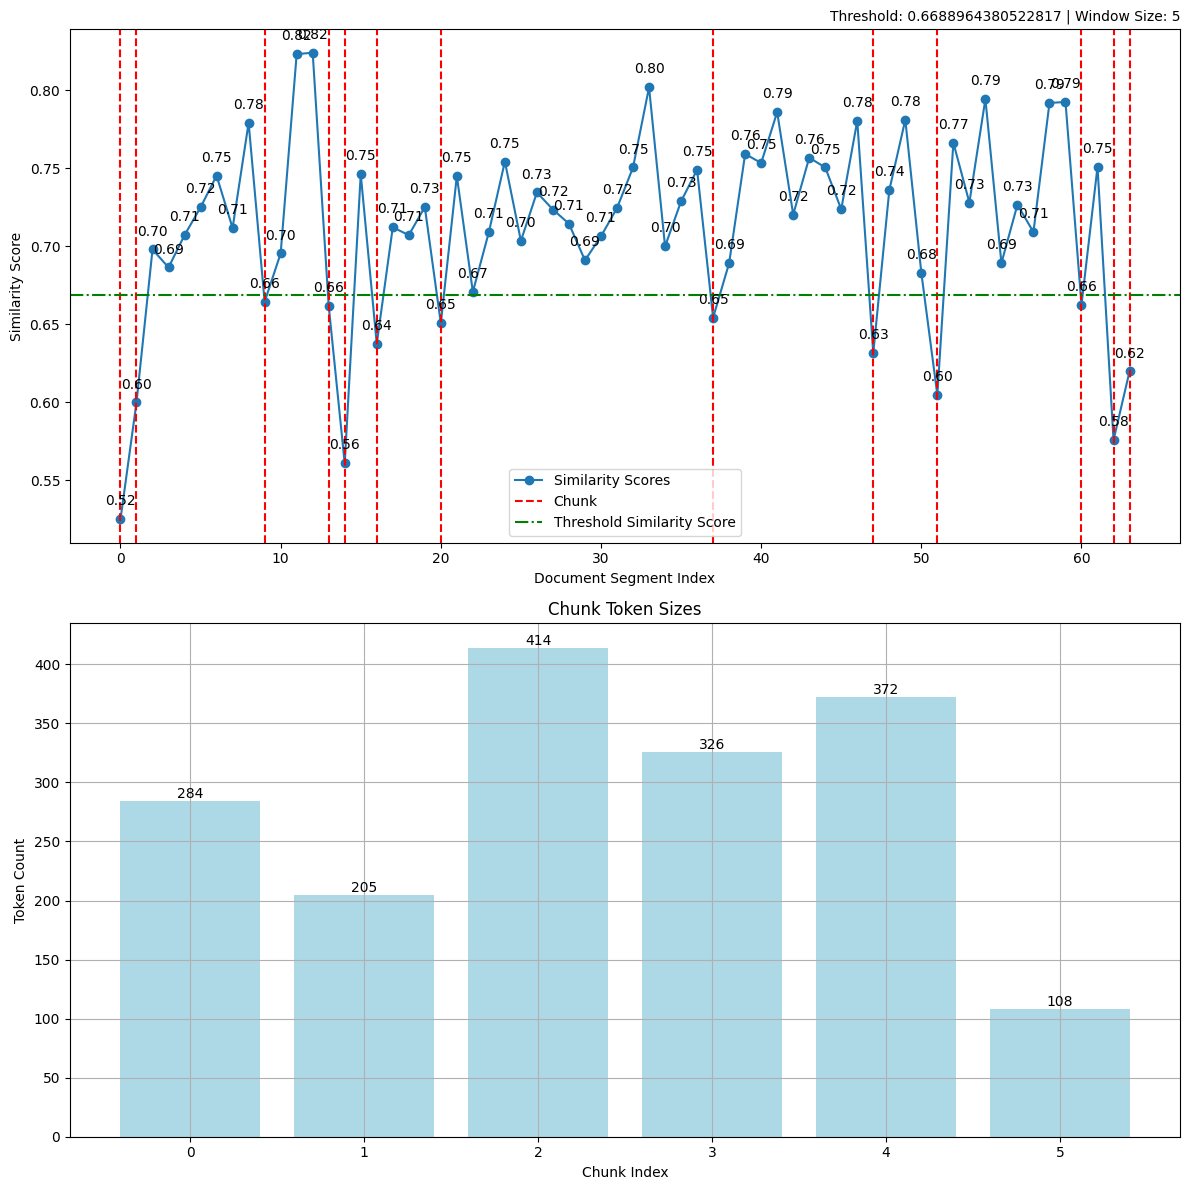

 79%|███████▉  | 15/19 [00:23<00:06,  1.54s/it]

Chunking Statistics:
  - Total Documents: 65
  - Total Chunks: 6
  - Chunks by Threshold: 5
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 108
  - Maximum Token Size of Chunk: 414
  - Similarity Chunk Ratio: 0.83


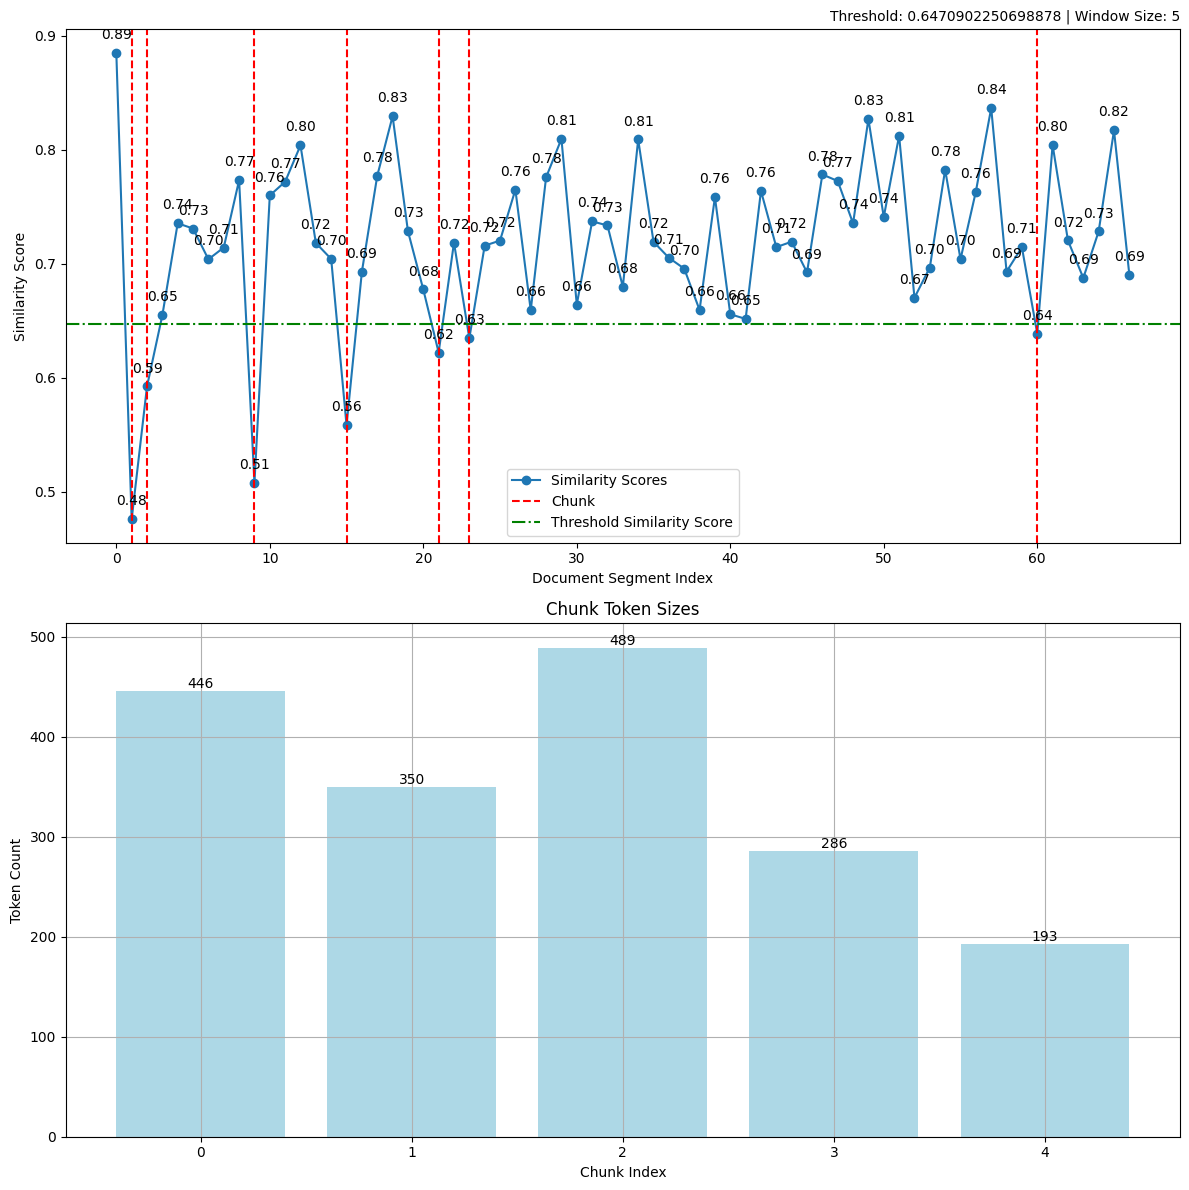

 84%|████████▍ | 16/19 [00:24<00:04,  1.53s/it]

Chunking Statistics:
  - Total Documents: 68
  - Total Chunks: 5
  - Chunks by Threshold: 3
  - Chunks by Max Chunk Size: 1
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 193
  - Maximum Token Size of Chunk: 489
  - Similarity Chunk Ratio: 0.60


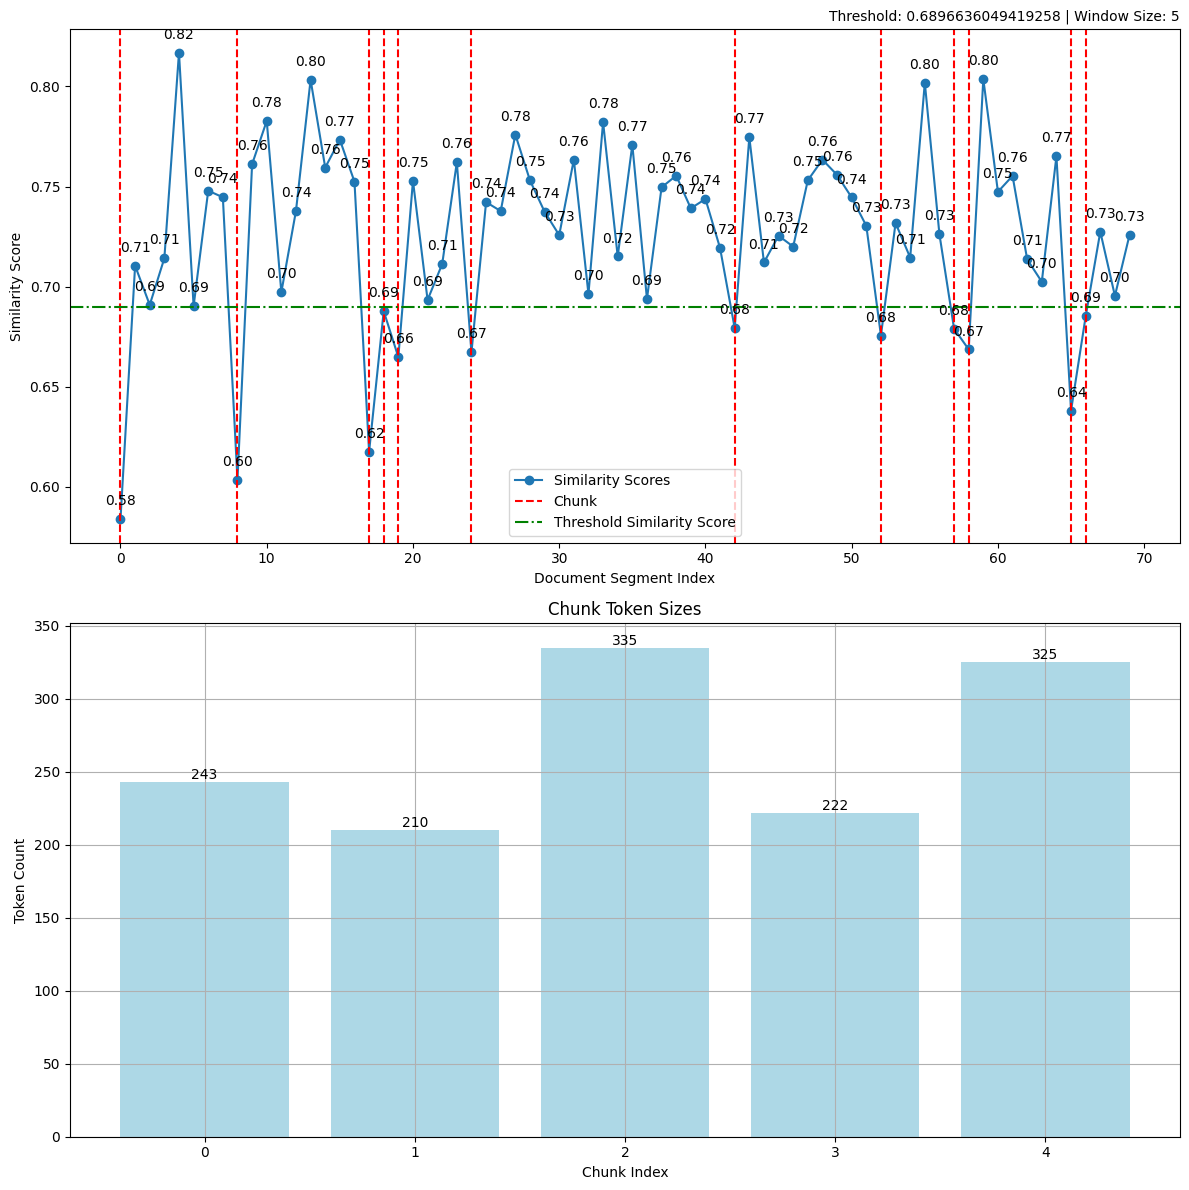

 89%|████████▉ | 17/19 [00:26<00:02,  1.48s/it]

Chunking Statistics:
  - Total Documents: 71
  - Total Chunks: 5
  - Chunks by Threshold: 4
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 210
  - Maximum Token Size of Chunk: 335
  - Similarity Chunk Ratio: 0.80


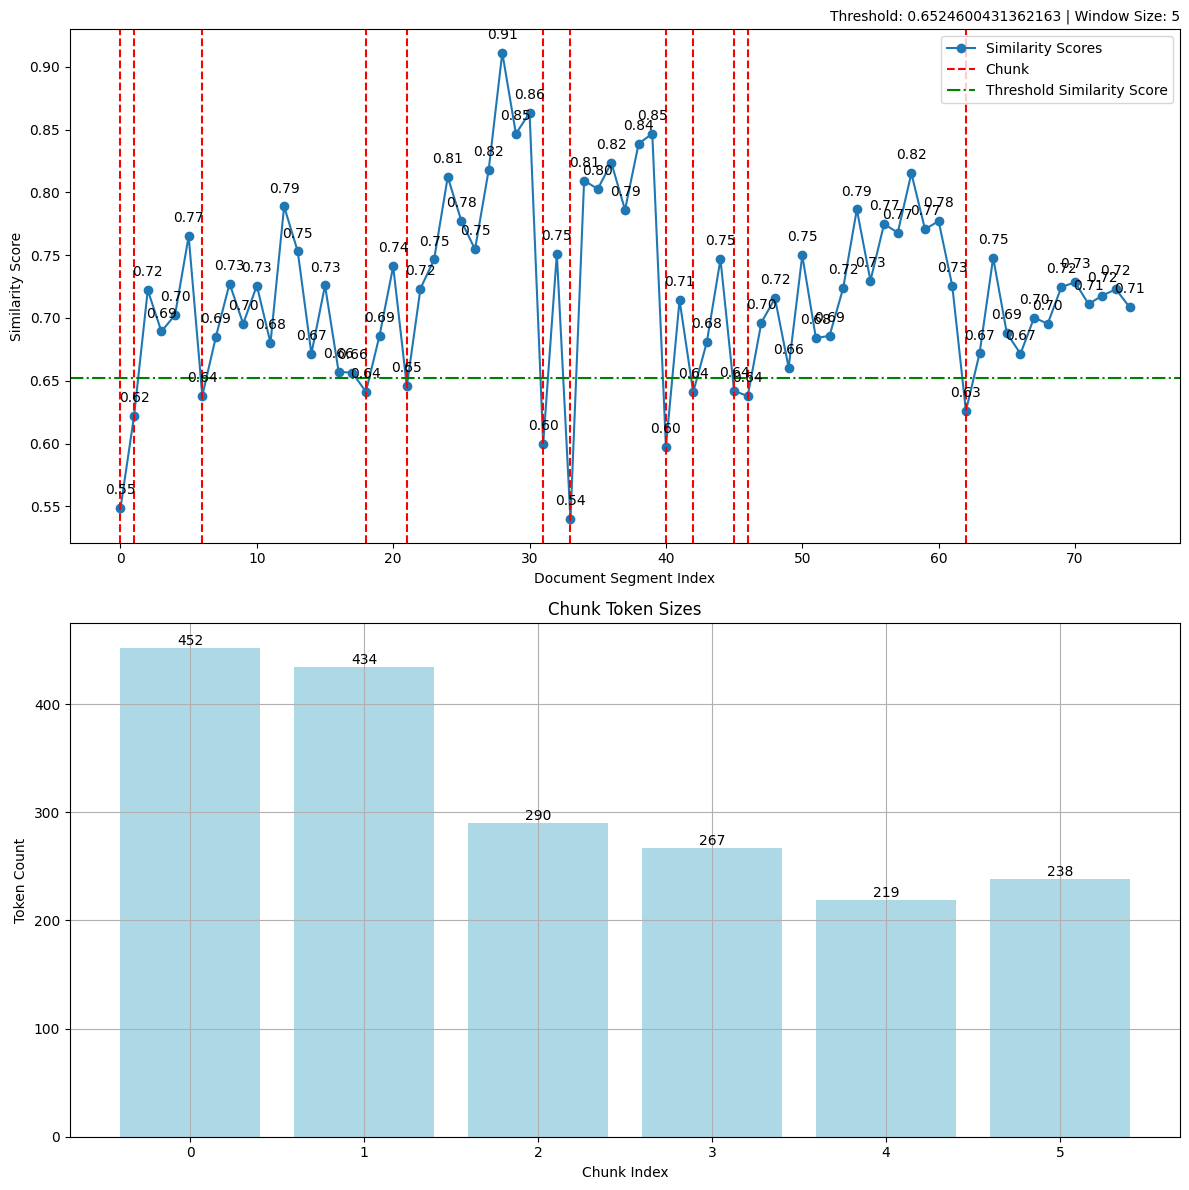

 95%|█████████▍| 18/19 [00:28<00:01,  1.59s/it]

Chunking Statistics:
  - Total Documents: 76
  - Total Chunks: 6
  - Chunks by Threshold: 3
  - Chunks by Max Chunk Size: 2
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 219
  - Maximum Token Size of Chunk: 452
  - Similarity Chunk Ratio: 0.50


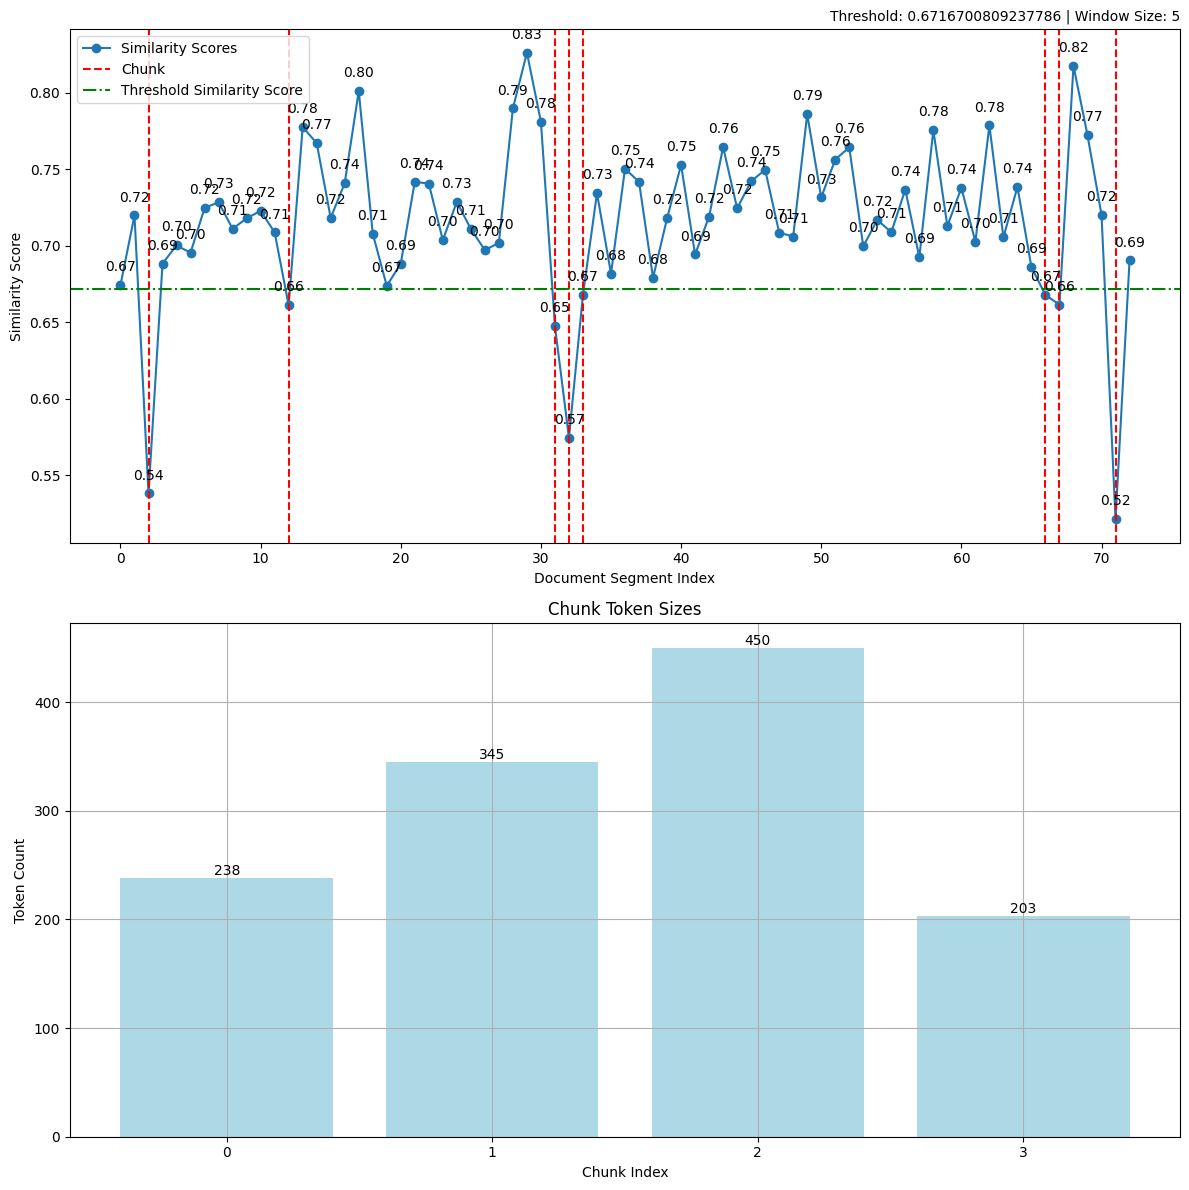

100%|██████████| 19/19 [00:28<00:00,  1.52s/it]

Chunking Statistics:
  - Total Documents: 74
  - Total Chunks: 4
  - Chunks by Threshold: 3
  - Chunks by Max Chunk Size: 0
  - Last Chunk: 1
  - Minimum Token Size of Chunk: 203
  - Maximum Token Size of Chunk: 450
  - Similarity Chunk Ratio: 0.75


In [4]:
encoder = FastEmbedEncoder()
chunker = StatisticalChunker(encoder=encoder,enable_statistics=True,plot_chunks=True,min_split_tokens=200, max_split_tokens=CONTEXT_MAX_SPLIT_TOKENS)
chunks = chunker(docs=[raw_text])

In [5]:
_log.setLevel(level=logging.INFO)

llm_base = OpenLLM(
    model=os.getenv("MODEL_NAME"), 
    api_base=os.getenv("LLM_URL"),
    api_key=os.getenv("API_KEY") )

Design Notes

1. Does the answers for the questions have to come from the actual context in the file or can the context be a summarization of the info that's in the knowledge markdown files
Every fact should be supported by the context, but the answers do not need to be verbatim.

2. The docs say that "Each qna.yaml file needs at least three question and answer pairs per context chunk with a maximum token count of 250 tokens.". Is that 250 tokens per context or per question and answer pair?
The 250 is an approximate number based on the maximum total size for SDG. The total tokens of Context + 3 Q&A must be less than 750 tokens. To have enough data for a context to answer the questions, an approximate 500 tokens are recommended for context, and the remaining 250 for the 3 Q&A.
At the end, the Q&A length is no problem as long as the context+3 Q&As remain < 750

3. Also from the docs, "Each qna.yaml needs five context blocks and has a maximum token count of 500 tokens." Is that per context or for all contexts?
This is per context, and the recommended 500 is to ensure there is enough data in the context to answer the questions. It can be less or it can be more, as long as the final lenght of Context + 3 Q&A < 750 tokens.

In [6]:
MAX_TOKENS_CONTEXT=500
MAX_TOKENS_QNA=250

In [7]:
class QuestionAndAnswer(BaseModel):
    question: str
    answer: str

class SeedExample(BaseModel):
    context: Annotated[str, Field(None,max_length=500)]
    questions_and_answers: List[QuestionAndAnswer] = Field(None, min_items=3, set=True)

class QNAModel(BaseModel):
    version: Annotated[int,Field(3)]
    created_by: Annotated[str, Field(None)]
    domain: Annotated[str, Field(None)]
    seed_examples: Annotated[List[SeedExample], Field(None, min_items=5, set=True)]

print(QNAModel.model_json_schema())

{'$defs': {'QuestionAndAnswer': {'properties': {'question': {'title': 'Question', 'type': 'string'}, 'answer': {'title': 'Answer', 'type': 'string'}}, 'required': ['question', 'answer'], 'title': 'QuestionAndAnswer', 'type': 'object'}, 'SeedExample': {'properties': {'context': {'default': None, 'maxLength': 500, 'title': 'Context', 'type': 'string'}, 'questions_and_answers': {'default': None, 'items': {'$ref': '#/$defs/QuestionAndAnswer'}, 'minItems': 3, 'set': True, 'title': 'Questions And Answers', 'type': 'array'}}, 'title': 'SeedExample', 'type': 'object'}}, 'properties': {'version': {'default': 3, 'title': 'Version', 'type': 'integer'}, 'created_by': {'default': None, 'title': 'Created By', 'type': 'string'}, 'domain': {'default': None, 'title': 'Domain', 'type': 'string'}, 'seed_examples': {'default': None, 'items': {'$ref': '#/$defs/SeedExample'}, 'minItems': 5, 'set': True, 'title': 'Seed Examples', 'type': 'array'}}, 'title': 'QNAModel', 'type': 'object'}


In [12]:
gen_prompt=f"You are a helpful question and answer writing assistant. Given the following information generate 1 seed examples containing 3 question and answer pairs. Ensure that the questions can be answered by the information given. Do not number the pairs.  All output MUST be in valid JSON format.\n\nInformation:"

json_prompt=f"\n\nHere's a JSON schema to follow: {SeedExample.model_json_schema()}.\n\nOutput a valid JSON object but do not repeat the schema."

for ch in chunks[0]:

    llm_msg = gen_prompt+ch.content+json_prompt
    _log.debug(llm_msg)

    it = llm_base.complete(llm_msg,max_tokens=MAX_TOKENS_QNA,timeout=120.0)
    
    # Ensure that we just take the json output, sometimes we get some rubbish upfront
    json_start = it.text.find('{')
    extracted_json = it.text[json_start:]


    qna_list=[]
    try:
        res = SeedExample.model_validate(from_json(extracted_json,allow_partial=True,cache_strings='keys'))
        res.context=ch.content
        yml = to_yaml_str(res)
        print(yml)
    except (ValidationError ,ValueError) as e:
        _log.error(e,extracted_json)

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: "## REGULATIONS ## COUNCIL REGULATION (EU) 2021/1173 of 13 July 2021 on establishing
  the European High Performance Computing Joint Undertaking and repealing Regulation
  (EU) 2018/1488 THE COUNCIL OF THE EUROPEAN UNION, Having regard to the Treaty on
  the Functioning of the European Union, and in particular Article 187 and the first
  paragraph of Article 188 thereof, Having regard to the proposal from the European
  Commission, Having regard to the opinion of the European Parliament ( 1 ), Having
  regard to the opinion of the European Economic and Social Committee ( 2 ), ## Whereas:
  (1) Regulation (EU) 2021/695 of the European Parliament and of the Council ( 3 )
  establishes Horizon Europe -the Framework Programme for Research and Innovation
  ('Horizon Europe'). Parts of Horizon Europe may be implemented through European
  Partnerships, with private and/or public sector partners, in order to achieve the
  greatest possible impact of Union funding and the most effectiv

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: Such partnerships should be implemented only where other parts of Horizon
  Europe, including other forms of European Partnerships, would not achieve its objectives
  or would not generate the necessary expected impacts, and if justified by a long-term
  perspective and high degree of integration. The conditions under which such partnerships
  are created are specified in that Regulation. (3) Regulation (EU) 2021/694 of the
  European Parliament and of the Council ( 4 ) establishes the Digital Europe Programme.
  The Digital Europe Programme supports the implementation of projects of common interest
  which aim at the acquisition, deployment and operation of a world-class supercomputing,
  quantum and data infrastructure, at federation and interconnection, and at widening
  the use of supercomputing services and the development of key skills. (4) Regulation
  (EU) 2021/1153 of the European Parliament and of the Council ( 5 ) establishes the
  Connecting Europe Facility. The Co

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: ( 1 ) Opinion of 24 June 2021 (not yet published in the Official Journal).
  ( 2 ) Opinion of 27 January 2021 (OJ C 123, 9.4.2021, p. 7). ( 3 ) Regulation (EU)
  2021/695 of the European Parliament and of the Council of 28 April 2021 establishing
  Horizon Europe - the Framework Programme for Research and Innovation, laying down
  its rules for participation and dissemination, and repealing Regulations (EU) No
  1290/2013 and (EU) No 1291/2013 (OJ L 170, 12.5.2021, p. 1). ( 4 ) Regulation (EU)
  2021/694 of the European Parliament and of the Council of 29 April 2021 establishing
  the Digital Europe Programme and repealing Decision (EU) 2015/2240 (OJ L 166, 11.5.2021,
  p. 1). ( 5 ) Regulation (EU) 2021/1153 of the European Parliament and of the Council
  of 7 July 2021 establishing the Connecting Europe Facility and repealing Regulations
  (EU) No 1316/2013 and (EU) No 283/2014 (OJ L 249, 14.7.2021, p. 38).
questions_and_answers:
- answer: Horizon Europe
  question: What is t

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: "interest which aim at the development and construction of new infrastructures
  and services, or at the upgrading of existing infrastructures and services, in the
  transport, telecommunications and energy sectors. The Connecting Europe Facility
  contributes to supporting digital connectivity infrastructures of common interest
  bringing significant spillover societal benefits. (5) The Communication from the
  Commission of 19 February 2020 entitled 'A European Strategy for Data' outlines
  Europe's strategy for policy measures and investments to enable the data economy
  for the coming five years. It emphasises the creation of European public common
  data spaces that will boost growth and create value. Support for the creation of
  such common European data spaces and federated, secure cloud infrastructures would
  ensure that more data becomes available for use in the economy and society, while
  keeping companies and individuals who generate the data in control. High Per

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: Repair and Prepare for the Next Generation' identified a number of strategic
  digital capacities and capabilities that included High Performance Computers and
  quantum technologies as a priority in the Recovery and Resilience Facility, InvestEU
  and the Strategic Investment Facility. (9) Europe's leading role in the data economy,
  its scientific excellence, and its industrial strength increasingly depend on its
  ability to develop key High Performance Computing technologies, to provide access
  to world-class supercomputing and data infrastructures, and to maintain its present
  leadership in High Performance Computing applications. High Performance Computing
  is a mainstream technology for the digital transformation of the European economy,
  enabling many traditional industrial sectors to innovate with higher value products
  and services. In combination with other advanced digital technologies such as artificial
  intelligence, big data and cloud technologies, High Pe

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: for social innovation and economic growth. An example is the Destination
  Earth initiative announced in the Communications from the Commission of 11 December
  2019 entitled 'The European Green Deal', and of 19 February 2020 entitled 'A European
  strategy for data' and 'Shaping Europe's digital future'. (11) Global events such
  as the COVID-19 pandemic have shown the importance of investing in High Performance
  Computing and health-related modelling platforms and tools, as they are playing
  a key role in the fight against the pandemic, often in combination with other digital
  technologies such as big data and artificial intelligence. High Performance Computing
  is being used to accelerate the identification and production of treatments, including
  vaccines, to predict the virus' spread, to help plan the distribution of medical
  supplies and resources, and to simulate post-epidemic exit measures in order to
  evaluate different scenarios. High Performance Computing mod

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"
--- Logging error ---
Traceback (most recent call last):
  File "/tmp/ipykernel_449701/3337502044.py", line 19, in <module>
    res = SeedExample.model_validate(from_json(extracted_json,allow_partial=True,cache_strings='keys'))
  File "/home/noelo/.pyenv/versions/3.10.14/envs/instvenv/lib/python3.10/site-packages/pydantic/main.py", line 568, in model_validate
    return cls.__pydantic_validator__.validate_python(
pydantic_core._pydantic_core.ValidationError: 1 validation error for SeedExample
questions_and_answers.2.answer
  Field required [type=missing, input_value={'question': 'What are so...omputing technologies?'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.8/v/missing

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/noelo/.pyenv/versions/3.10.14/lib/python3.10/logging/__init__.py", line 110

context: (19) The Joint Undertaking should be financed by the Union programmes under
  the multiannual financial framework for the years 2021 to 2027 (the 'MFF 2021-2027').
  It should be established in 2021 and operate until 31 December 2033 to equip the
  Union with a world-class federated, secure and hyper-connected supercomputing infrastructure,
  and to develop the necessary technologies, applications and skills for reaching
  exascale capabilities around 2022-2024, and post exascale around 2025 - 2027, while
  promoting a world-class European High Performance Computing and quantum computing
  innovation ecosystem. In accordance with Article 10(2)(c) of Regulation (EU) 2021/695,
  Joint Undertakings are to have a clear life cycle approach. In order to adequately
  protect the financial interests of the Union, the Joint Undertaking should be set
  up for a period ending 31 December 2033 to allow it to exercise its responsibilities
  with regard to grant implementation until the las

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: Conversely, the Union contribution, including any additional funds from third
  countries associated to Horizon Europe, the Digital Europe Programme or the Connecting
  Europe Facility, should not exceed 50 % of the aggregated Joint Undertaking budgetary
  commitments. (22) The Union contribution should cover the administrative costs of
  the Joint Undertaking. (23) In accordance with point (c) of Article 10(1) of Regulation
  (EU) 2021/695, the Joint Undertaking is to implement a central management of all
  financial contributions through a coordinated approach. Accordingly, each Participating
  State should conclude one or more administrative agreements with the Joint Undertaking
  laying down the coordination mechanism for the payment of and reporting on contributions
  to applicants established in that Participating State. In order to ensure coherence
  with their national strategic priorities, Participating States should be provided
  with a right of veto over the use of 

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: (24) With a view to regaining a leading position in High Performance Computing
  technologies, and developing a full High Performance Computing and quantum computing
  ecosystem for the Union, in 2014, the industrial and research stakeholders in the
  European Technology Platform for High Performance Computing (ETP4HPC) Association
  established a contractual public private partnership with the Union. Its mission
  is to build a European world-class High Performance Computing technology value chain
  that would be globally competitive, fostering synergies between the three main components
  of the High Performance Computing ecosystem, namely technology development, applications
  and supercomputing infrastructure. Considering its expertise, and its role in bringing
  together the relevant private stakeholders in High Performance Computing, the ETP4HPC
  should be eligible for membership in the Joint Undertaking. (25) With a view to
  strengthening the data value chain, enhanci

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: In 2020 BDVA changed its name to Data, AI and Robotics (DAIRO). Considering
  its expertise and its role in bringing together the relevant private stakeholders
  of big data, DAIRO should be eligible for membership in the Joint Undertaking. (26)
  The private associations ETP4HPC and DAIRO have expressed, in writing, their willingness
  to contribute to the Joint Undertaking's multiannual strategic programme and bring
  their expertise into the realisation of the objectives of the Joint Undertaking.
  It is appropriate that those private associations accept the Statutes set out in
  the Annex to this Regulation by means of a letter of endorsement. (27) The Joint
  Undertaking should address clearly defined topics that would enable academia and
  European industries at large to design, develop and use the most innovative technologies
  in High Performance Computing and quantum computing, and to establish an integrated
  and federated, secure networked infrastructure across the 

INFO:httpx:HTTP Request: POST http://localhost:11434/v1/completions "HTTP/1.1 200 OK"


context: It should also be able to cooperate with the GÉANT network for the connectivity
  between the supercomputers of the Joint Undertaking, as well as with other European
  supercomputing and data infrastructures. (30) The Joint Undertaking should contribute
  to reducing the specific skills gap across the Union by engaging in awareness raising
  measures and assisting in the building of new knowledge and human capital. This
  includes the design and support of specific educational and training activities
  in close cooperation with the relevant public and private actors. (31) In line with
  the external policy objectives and international commitments of the Union, the Joint
  Undertaking should facilitate cooperation between the Union and international actors
  by defining a cooperation strategy, including identifying and promoting areas for
  cooperation in research and development and skills development and implementing
  actions where there is a mutual benefit, as well as ensur

KeyboardInterrupt: 